# Capstone Webscrapping using BeautifulSoup

- Data yang digunakan diambil dari https://news.mifx.com/kurs-valuta-asing?kurs=JPY
- Data tersebut merupakan data kurs jual dan beli mata uang Yen ke Rupiah
- Data yang diambil adalah Tanggal, Kurs Jual, dan Kurs Beli

**Melakukan import untuk libary yang dibutuhkan**

In [8]:
import pandas as pd
import requests
import flask
from bs4 import BeautifulSoup

**Membuat koneksi untuk memanggil data yang dibutuhkan**

In [9]:
con = requests.get('https://news.mifx.com/kurs-valuta-asing?kurs=JPY')
con.content

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta name="keywords" content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," />\n<meta property="og:image" content="favicon.jpg?v=1570462055" />\n\n<meta name="author" content

**Merapihkan data untuk memudahkan dalam membaca yang diperlukan**

In [10]:
isi = BeautifulSoup(con.content, "html.parser")
print(isi.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

**Menemukan kelas dan atribut yang menyimpan data yang ingin diambil**

In [11]:
table = isi.find('table', attrs={'class':'centerText newsTable2'})
print(table.prettify())

<table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   06 Agustus 2020
  </td>
  <td>
   138,88
  </td>
  <td>
   137,48
  </td>
 </tr>
 <tr>
  <td>
   05 Agustus 2020
  </td>
  <td>
   139,23
  </td>
  <td>
   137,84
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   04 Agustus 2020
  </td>
  <td>
   139,19
  </td>
  <td>
   137,79
  </td>
 </tr>
 <tr>
  <td>
   03 Agustus 2020
  </td>
  <td>
   139,72
  </td>
  <td>
   138,32
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   30 Juli 2020
  </td>
  <td>
   140,16
  </td>
  <td>
   138,75
  </td>
 </tr>
</table>



**Mencari secara spesifik bagian data yang dibutuhkan saja**

In [12]:
tr = table.find_all('tr')
tr

[<tr class="colorWhite fontsize14 firstRow">
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>06 Agustus 2020</td>
 <td>138,88</td>
 <td>137,48</td>
 </tr>,
 <tr>
 <td>05 Agustus 2020</td>
 <td>139,23</td>
 <td>137,84</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>04 Agustus 2020</td>
 <td>139,19</td>
 <td>137,79</td>
 </tr>,
 <tr>
 <td>03 Agustus 2020</td>
 <td>139,72</td>
 <td>138,32</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>30 Juli 2020</td>
 <td>140,16</td>
 <td>138,75</td>
 </tr>]

**Fungsi looping untuk mencari dan mengambil data yang akan digunakan**

In [13]:
place = []

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip()
    kjual = row.find_all('td')[1].text
    kjual = kjual.strip()
    kbeli = row.find_all('td')[2].text
    kbeli = kbeli.strip()
    
    place.append((tanggal, kjual, kbeli))
    
place = place[::-1]
place

[('30\xa0Juli\xa02020', '140,16', '138,75'),
 ('03\xa0Agustus\xa02020', '139,72', '138,32'),
 ('04\xa0Agustus\xa02020', '139,19', '137,79'),
 ('05\xa0Agustus\xa02020', '139,23', '137,84'),
 ('06\xa0Agustus\xa02020', '138,88', '137,48')]

**Membuat dataframe**

In [14]:
df = pd.DataFrame(place, columns = ('Tanggal','Jual', 'Beli'))
df.dtypes

Tanggal    object
Jual       object
Beli       object
dtype: object

**Mengubah data "," menjadi "." dan mengubah tipe data**

In [15]:
df['Jual'] = df['Jual'].str.replace(",",".")
df['Beli'] = df['Beli'].str.replace(",",".")
df['Jual'] = df['Jual'].astype('float64')
df['Beli'] = df['Beli'].astype('float64')
df.set_index("Tanggal")

,Jual,Beli
Tanggal,,
30 Juli 2020,140.16,138.75
03 Agustus 2020,139.72,138.32
04 Agustus 2020,139.19,137.79
05 Agustus 2020,139.23,137.84
06 Agustus 2020,138.88,137.48


**Membuat visualisasi dari data diatas**

<AxesSubplot:>

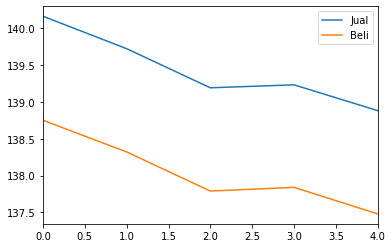

In [17]:
df.plot.line()

**Analisis dan kesimpulan:**

Analisis ini dilakukan untuk mengetahui perubahan harga kurs jual dan kurs beli dari dari data yang didapatkan pada url diatas. Dapat dilihat bahwa pegerakan kurs jual dan kurs beli relatif sama .Disaat harga kurs jual turun, kurs beli juga mengalami penurunan dan disaat kurs jual naik, kurs beli  juga naik.